In [1]:
import pandas as pd
base = pd.read_csv('census.csv')
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
base['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [3]:
def converte_classe(rotulo):
    if rotulo == ' >50K':
        return 1
    else:
        return 0

In [4]:
base['income'] = base['income'].apply(converte_classe)

In [5]:
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [6]:
base['income'].unique()

array([0, 1])

In [7]:
X = base.drop('income', axis = 1)

In [8]:
X.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [9]:
y = base['income']

In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [11]:
type(y)

pandas.core.series.Series

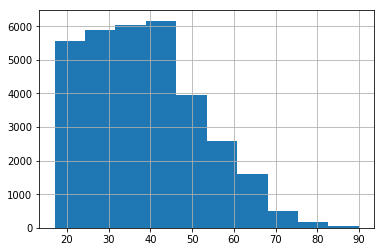

In [22]:
%matplotlib inline
base.age.hist()

In [ ]:
import tensorflow as tf

In [25]:
idade = tf.feature_column.numeric_column('age')

In [26]:
idade_categorica = [tf.feature_column.bucketized_column(idade, boundaries=[20,30,40,50,60,70,80,90])]

In [27]:
print(idade_categorica)

[_BucketizedColumn(source_column=_NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]


In [29]:
X.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [30]:
nome_colunas_categoricas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
                           'native-country']

In [31]:
X['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [32]:
X['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [33]:
X['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [34]:
colunas_categoricas = [tf.feature_column.categorical_column_with_vocabulary_list(key = c, vocabulary_list=X[c].unique()) for c in nome_colunas_categoricas]

In [39]:
print(colunas_categoricas[3])

_VocabularyListCategoricalColumn(key='occupation', vocabulary_list=(' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [41]:
nome_colunas_numericas = ['final-weight', 'education-num', 'capital-gain', 'capital-loos', 'hour-per-week']

In [42]:
colunas_numericas = [ tf.feature_column.numeric_column(key = c) for c in nome_colunas_numericas ]

In [44]:
print(colunas_numericas[1])

_NumericColumn(key='education-num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [46]:
colunas = idade_categorica + colunas_categoricas + colunas_numericas

In [47]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.3)

In [48]:
X_treinamento.shape

(22792, 14)

In [49]:
X_teste.shape

(9769, 14)

In [50]:
funcao_treinamento = tf.estimator.inputs.pandas_input_fn(x = X_treinamento, y = y_treinamento,
                                                        batch_size = 32, num_epochs = None, shuffle = True)

In [ ]:
classificador = tf.estimator.LinearClassifier(feature_columns=colunas)

In [52]:
classificador.train(input_fn=funcao_treinamento, steps = 10000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/7f/wlmrltf57q95bdd5fl85dpw40000gn/T/tmpsb6xcfsl/model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 1
INFO:tensorflow:global_step/sec: 127.436
INFO:tensorflow:loss = 14993.297, step = 101 (0.786 sec)
INFO:tensorflow:global_step/sec: 284.873
INFO:tensorflow:loss = 24228.086, step = 201 (0.351 sec)
INFO:tensorflow:global_step/sec: 280.478
INFO:tensorflow:loss = 6436.5107, step = 301 (0.356 sec)
INFO:tensorflow:global_step/sec: 282.374
INFO:tensorflow:lo

INFO:tensorflow:global_step/sec: 310.247
INFO:tensorflow:loss = 1412.0627, step = 7001 (0.322 sec)
INFO:tensorflow:global_step/sec: 318.036
INFO:tensorflow:loss = 1890.6433, step = 7101 (0.314 sec)
INFO:tensorflow:global_step/sec: 315.774
INFO:tensorflow:loss = 2837.5981, step = 7201 (0.317 sec)
INFO:tensorflow:global_step/sec: 327.927
INFO:tensorflow:loss = 5207.9956, step = 7301 (0.305 sec)
INFO:tensorflow:global_step/sec: 295.494
INFO:tensorflow:loss = 5434.626, step = 7401 (0.338 sec)
INFO:tensorflow:global_step/sec: 316.247
INFO:tensorflow:loss = 1128.0916, step = 7501 (0.316 sec)
INFO:tensorflow:global_step/sec: 315.719
INFO:tensorflow:loss = 917.775, step = 7601 (0.317 sec)
INFO:tensorflow:global_step/sec: 324.17
INFO:tensorflow:loss = 1001.22925, step = 7701 (0.309 sec)
INFO:tensorflow:global_step/sec: 329.166
INFO:tensorflow:loss = 886.13275, step = 7801 (0.305 sec)
INFO:tensorflow:global_step/sec: 318.06
INFO:tensorflow:loss = 1517.2881, step = 7901 (0.314 sec)
INFO:tensorflo

In [53]:
funcao_previsao = tf.estimator.inputs.pandas_input_fn(x = X_teste, batch_size = 32, shuffle = False)

In [54]:
previsoes = classificador.predict(input_fn=funcao_previsao)

In [55]:
list(previsoes)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/7f/wlmrltf57q95bdd5fl85dpw40000gn/T/tmpsb6xcfsl/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-341.4848], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-27.766296], dtype=float32),
  'logistic': array([8.734754e-13], dtype=float32),
  'probabilities': array([1.0000000e+00, 8.7347545e-13], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-72.257225], dtype=float32),
  'logistic': array([4.1599287e-32], dtype=float32),
  'probabilities': array([1.0000000e+00, 4.1599287e-32], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-144.11172], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-236.0904], dtype=float32),
  'logistic': array([0.], dtype=float32),
  '

In [56]:
previsoes_final = []
for p in classificador.predict(input_fn=funcao_previsao):
    previsoes_final.append(p['class_ids'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/7f/wlmrltf57q95bdd5fl85dpw40000gn/T/tmpsb6xcfsl/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [57]:
previsoes_final

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),

In [58]:
from sklearn.metrics import accuracy_score
taxa_acerto = accuracy_score(y_teste, previsoes_final)
taxa_acerto

0.7993653393387246